In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cmocean as cm
import xarray as xr
from datetime import datetime
import os
import math

%matplotlib inline

from salishsea_tools import visualisations as vis

In [2]:
def make_prefix(date, path, res):
    """Construct path prefix for local SalishSeaCast results given date object and paths dict
    e.g., /results2/SalishSea/nowcast-green.201905/daymonthyear/SalishSea_1d_yyyymmdd_yyyymmdd
    """

    datestr = '_'.join(np.repeat(date.strftime('%Y%m%d'), 2))
    folder = date.strftime("%d%b%y").lower()
    prefix = os.path.join(path, f'{folder}/SalishSea_1{res}_{datestr}')
    
    return prefix

In [3]:
#define paths
NEMO = '/results2/SalishSea/nowcast-green.201905/'
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
thalweg_in = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'

coords = xr.open_dataset('/ocean/rbeutel/MEOPAR/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask=xr.open_dataset('/ocean/rbeutel/MEOPAR/grid/mesh_mask201702.nc')

### Summer - typical estuarine flow

In [4]:
day = datetime(2020, 6, 1)

x_size_of_plot = 11
y_size_of_plot = 10
stepsize = 0.1
do_I_want_to_save_fig = False
titlefontsize = 20
cbarfontsize = 18
cbartickfontsize = 18
axistickfontsize = 18

In [5]:
# plotXR = xr.open_dataset(make_prefix(day,NEMO,'h')+'_grid_U.nc')
# plotXR = plotXR.resample(time_counter="D").mean(dim="time_counter")

# nc_file = "grid_U.nc"
# plotXR.to_netcdf(nc_file)

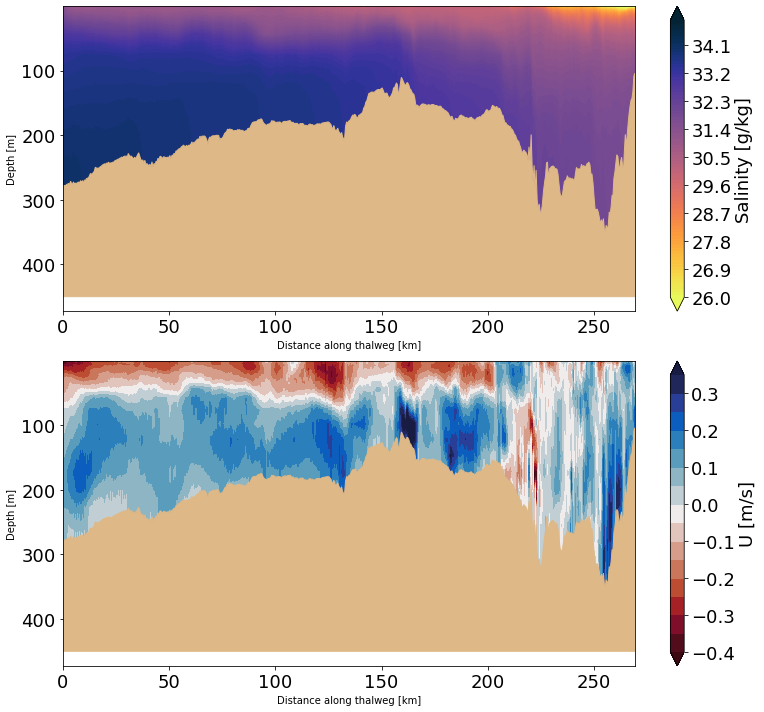

In [7]:
#SUMMER
tit = 'Typical Estuarine Flow'

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(x_size_of_plot,y_size_of_plot))
#salinity
nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
variable_to_plot = 'vosaline' #votemper for temperature
data_to_plot =  nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax1, data_to_plot, bathy, mesh, np.arange(26, 35, stepsize), cmap = cm.cm.thermal_r, thalweg_file=thalweg_in)
#ax1.set_title(tit , fontsize = titlefontsize)
cbar.set_label('Salinity [g/kg]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax1.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax1.set_xlim(0,269)
#ax1.set_ylim(120,0)

# #temerature
# nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
# variable_to_plot = 'votemper' 
# data_to_plot =  nc_to_plot[variable_to_plot][0,:,:,:]

# cbar = vis.contour_thalweg(ax2, data_to_plot, bathy, mesh,np.arange(6, 12, stepsize), cmap = cm.cm.thermal, thalweg_file=thalweg_in)
# #ax1.set_title(tit , fontsize = titlefontsize)
# cbar.set_label('Temperature [deg C]', fontsize = cbarfontsize)
# cbar.ax.tick_params(labelsize=cbartickfontsize) 
# ax2.tick_params(axis='both', which='major', labelsize=axistickfontsize)
# ax2.set_xlim(0,269)
# #ax1.set_ylim(120,0)

#velocity
nc_to_plot = nc.Dataset('grid_U.nc')
variable_to_plot = 'vozocrtx' 
data_to_plot = nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax2, data_to_plot, bathy, mesh, np.arange(-0.4, 0.4, 0.05), cmap = cm.cm.balance_r, thalweg_file=thalweg_in)
#ax2.set_title(tit , fontsize = titlefontsize)
cbar.set_label('U [m/s]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax2.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax2.set_xlim(0,269)
# #ax2.set_ylim(120,0)

fig.tight_layout()
plt.show()

if do_I_want_to_save_fig == True:
    fig.savefig(day.strftime('"%d%b%y"')+'_sal.png')

#### Just top 150 m (typically little to no perceivable motion bellow this in ocean parcels run)

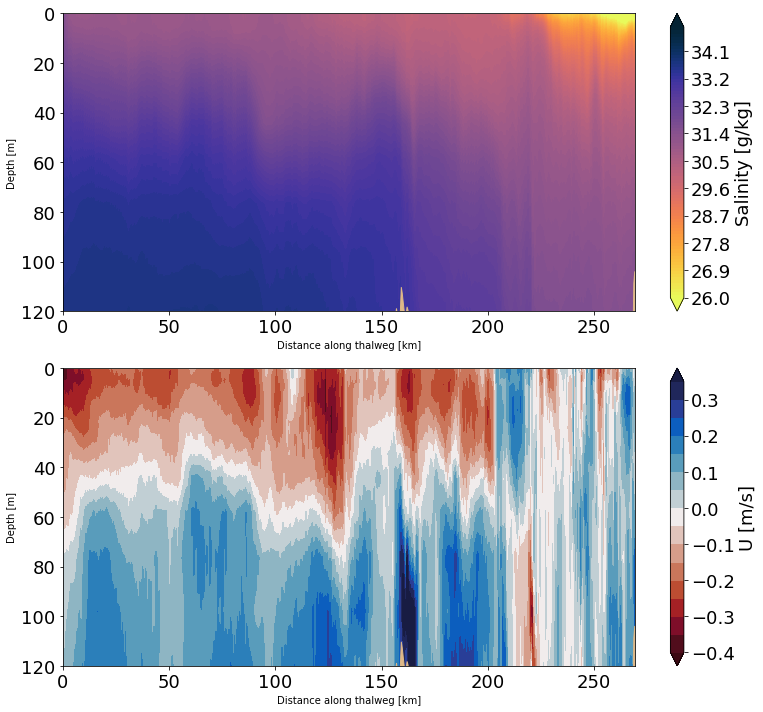

In [8]:
#SUMMER
tit = 'Typical Estuarine Flow'

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(x_size_of_plot,y_size_of_plot))
#salinity
nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
variable_to_plot = 'vosaline' #votemper for temperature
data_to_plot =  nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax1, data_to_plot, bathy, mesh, np.arange(26, 35, stepsize), cmap = cm.cm.thermal_r, thalweg_file=thalweg_in)
#ax1.set_title(tit , fontsize = titlefontsize)
cbar.set_label('Salinity [g/kg]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax1.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax1.set_xlim(0,269)
ax1.set_ylim(120,0)

# #temerature
# nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
# variable_to_plot = 'votemper' 
# data_to_plot =  nc_to_plot[variable_to_plot][0,:,:,:]

# cbar = vis.contour_thalweg(ax2, data_to_plot, bathy, mesh,np.arange(6, 12, stepsize), cmap = cm.cm.thermal, thalweg_file=thalweg_in)
# #ax1.set_title(tit , fontsize = titlefontsize)
# cbar.set_label('Temperature [deg C]', fontsize = cbarfontsize)
# cbar.ax.tick_params(labelsize=cbartickfontsize) 
# ax2.tick_params(axis='both', which='major', labelsize=axistickfontsize)
# ax2.set_xlim(0,269)
# ax2.set_ylim(120,0)

#velocity
nc_to_plot = nc.Dataset('grid_U.nc')
variable_to_plot = 'vozocrtx' 
data_to_plot = nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax2, data_to_plot, bathy, mesh, np.arange(-0.4, 0.4, 0.05), cmap = cm.cm.balance_r, thalweg_file=thalweg_in)
#ax2.set_title(tit , fontsize = titlefontsize)
cbar.set_label('U [m/s]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax2.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax2.set_xlim(0,269)
ax2.set_ylim(120,0)

fig.tight_layout()
plt.show()

if do_I_want_to_save_fig == True:
    fig.savefig(day.strftime('"%d%b%y"')+'_sal.png')

## Reverse Flow

In [9]:
day = datetime(2020, 1, 19)
#tested
#Jan 4 
#Jan 5
#Jan 6
#Jan 21 
#jan 19 #BEST
#jan 20

do_I_want_to_save_fig = False

In [12]:
plotXR = xr.open_dataset(make_prefix(day,NEMO,'h')+'_grid_U.nc')
plotXR = plotXR.resample(time_counter="D").mean(dim="time_counter")

nc_file = "grid_U_r_"+day.strftime('%Y%m%d')+'.nc'
# plotXR.to_netcdf(nc_file)

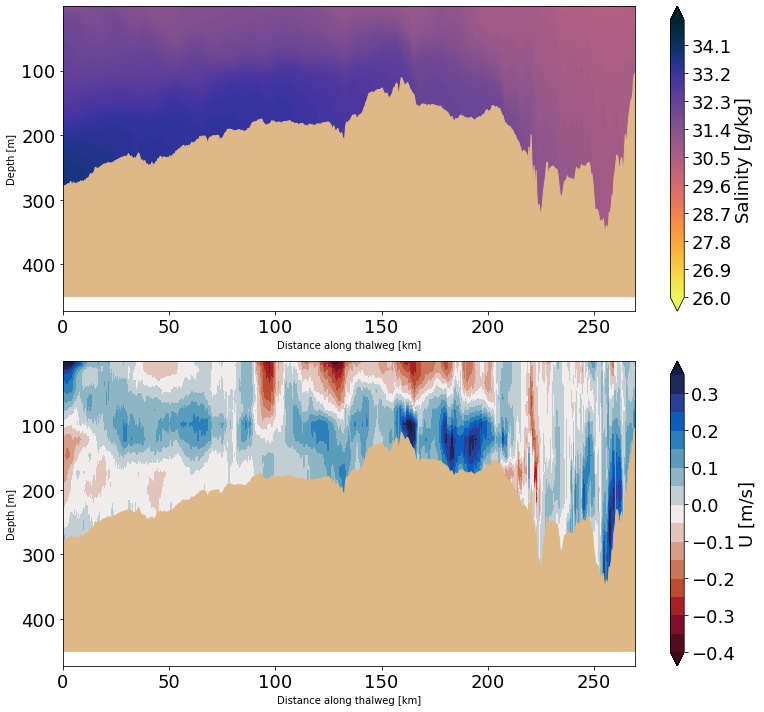

In [15]:
#REVERSE
tit = 'Reverse Flow'

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(x_size_of_plot,y_size_of_plot))
#salinity
nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
variable_to_plot = 'vosaline' #votemper for temperature
data_to_plot =  nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax1, data_to_plot, bathy, mesh, np.arange(26, 35, stepsize), cmap = cm.cm.thermal_r, thalweg_file=thalweg_in)
#ax1.set_title(tit , fontsize = titlefontsize)
cbar.set_label('Salinity [g/kg]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax1.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax1.set_xlim(0,269)
#ax1.set_ylim(120,0)

#velocity
nc_to_plot = nc.Dataset(nc_file)
variable_to_plot = 'vozocrtx' 
data_to_plot = nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax2, data_to_plot, bathy, mesh, np.arange(-0.4, 0.4, 0.05), cmap = cm.cm.balance_r, thalweg_file=thalweg_in)
#ax2.set_title(tit , fontsize = titlefontsize)
cbar.set_label('U [m/s]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax2.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax2.set_xlim(0,269)
# #ax2.set_ylim(120,0)

fig.tight_layout()
plt.show()

if do_I_want_to_save_fig == True:
    fig.savefig(day.strftime('"%d%b%y"')+'_sal.png')

### Doesn't really look like thalweg plot is as relevent for the reverse flow 
(reverse flow goes along southern coast but thalweg for the most part is in the middle) - lets try some cross sections along the JDF <br>
try to make cross-section plots based on Tereza's code here https://github.com/SalishSeaCast/analysis_tereza/blob/master/notebooks/RIVER_PAPER/201905_analysis/JdF_flux/JDF_water_coming_in_analysis-anomaly_fluxes.ipynb

In [58]:
nc_to_plot = nc.Dataset(nc_file)
variable_to_plot = 'vozocrtx' 
data_to_plot = nc_to_plot[variable_to_plot][0,:,361:(361+75),20]
data_to_plot[:,37]

masked_array(data=[-0.04727456, -0.04566845, -0.04445   , -0.04356456,
                   -0.04292027, -0.04273775, -0.04332523, -0.04366805,
                   -0.0443925 , -0.04578698, -0.0478344 , -0.04975997,
                   -0.05058221, -0.05015965, -0.04896521, -0.04763993,
                   -0.04637067, -0.04521313, -0.04314555, -0.04015925,
                   -0.03474937, -0.02369856, -0.01356276,  0.01653024,
                    0.05372766,  0.03899946, -0.02788913, -0.05899189,
                   -0.06309   , -0.07260807, -0.0670457 , -0.02090212,
                    0.02913248,  0.        ,  0.        ,  0.        ,
                    0.        ,  0.        ,  0.        ,  0.        ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [70]:
print(data.shape)
fact=0.7

(40, 75, 398)


<ipython-input-100-bad34696a0b1>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
<ipython-input-100-bad34696a0b1>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \


Text(5, 250, 'Olympic \n Penninsula')

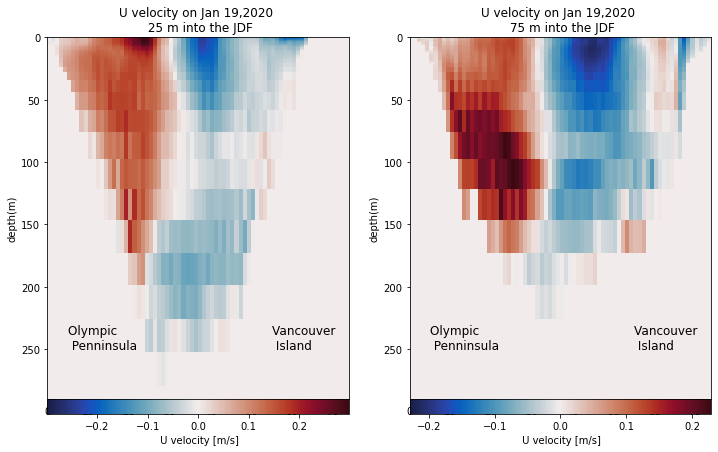

In [100]:
fig, [ax1,ax2]= plt.subplots(nrows=1, ncols=2, figsize =(17*fact,10*fact))

data_to_plot = nc_to_plot[variable_to_plot][0,:,361:(361+75),25]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
                      vmin = -1 * np.max(np.abs(data_to_plot)), vmax = np.max(np.abs(data_to_plot)))
ax1.set_ylim([0,290])
ax1.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax1, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label=' U velocity [m/s]')
ax1.set_title('U velocity on Jan 19,2020 \n 25 m into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax1.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax1.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax1.text(x, y, 'Olympic \n Penninsula', fontsize=12)

# ##############

data_to_plot = nc_to_plot[variable_to_plot][0,:,292:(292+75),80]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
                      vmin = -1 * np.max(np.abs(data_to_plot)), vmax = np.max(np.abs(data_to_plot)))
ax2.set_ylim([0,290])
ax2.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax2, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label=' U velocity [m/s]')
ax2.set_title('U velocity on Jan 19,2020 \n 75 m into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax2.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax2.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax2.text(x, y, 'Olympic \n Penninsula', fontsize=12)

<ipython-input-110-748c104f97e7>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
<ipython-input-110-748c104f97e7>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \


Text(5, 250, 'Olympic \n Penninsula')

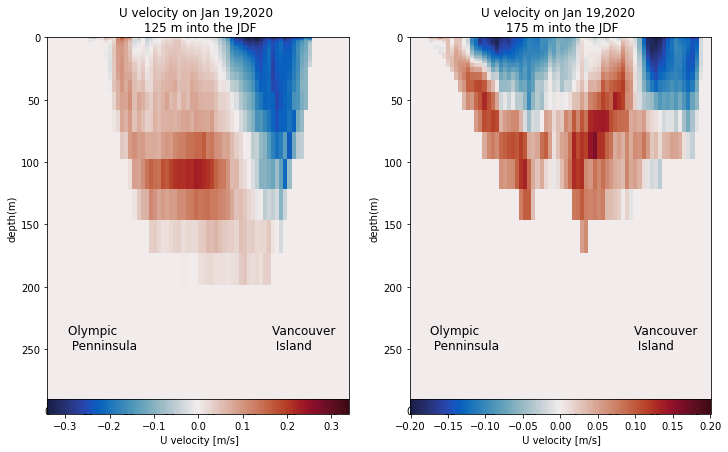

In [110]:
fig, [ax1,ax2]= plt.subplots(nrows=1, ncols=2, figsize =(17*fact,10*fact))

data_to_plot = nc_to_plot[variable_to_plot][0,:,255:(255+75),125]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax1.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
                      vmin = -1 * np.max(np.abs(data_to_plot)), vmax = np.max(np.abs(data_to_plot)))
ax1.set_ylim([0,290])
ax1.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax1, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label=' U velocity [m/s]')
ax1.set_title('U velocity on Jan 19,2020 \n 125 m into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax1.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax1.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax1.text(x, y, 'Olympic \n Penninsula', fontsize=12)

# ##############

data_to_plot = nc_to_plot[variable_to_plot][0,:,230:(230+75),175]
section_slice = np.arange(0,75)
zlevels = mesh['gdept_1d'][:]
tmesh = ax2.pcolormesh(section_slice[:],zlevels[0],data_to_plot, cmap = cm.cm.balance, \
                      vmin = -1 * np.max(np.abs(data_to_plot)), vmax = np.max(np.abs(data_to_plot)))
ax2.set_ylim([0,290])
ax2.invert_yaxis()
cbar = fig.colorbar(tmesh, ax=ax2, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label=' U velocity [m/s]')
ax2.set_title('U velocity on Jan 19,2020 \n 175 m into the JDF') #\n (negative values indicate transport out of domain)', y=1.1)
ax2.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax2.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax2.text(x, y, 'Olympic \n Penninsula', fontsize=12)

## Study Area

In [36]:
def plot_thalweg(ax, T_lon, T_lat):
    lines = np.loadtxt('/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
    lines = lines.astype(int)

    thalweg_lon = T_lon[lines[:,0],lines[:,1]]
    thalweg_lat = T_lat[lines[:,0],lines[:,1]]
    ax.plot(thalweg_lon, thalweg_lat, 'r')

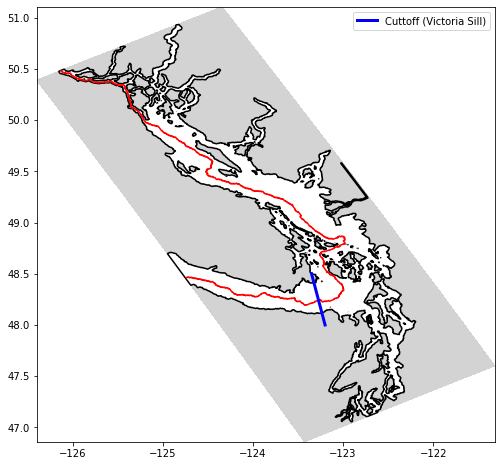

In [53]:
# Plot Basemap
x, y = coords.nav_lon.values, coords.nav_lat.values

fig, ax = plt.subplots(figsize=(19, 8))
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#ax.set_xlim([-124.8, -122.7])
#ax.set_ylim([48, 49.2])
ax.set_aspect(5/4.4)
nmin, nmax = 0, -1

plot_thalweg(ax, x, y)

# Box around model domain
ax.plot([-123.35,-123.2], [48.5, 48], 'b-',zorder=6, label="Cuttoff (Victoria Sill)", linewidth=3.0)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
plt.legend()

### Density calcs based on unesco formula

In [20]:
a0 = 999.842594
a1 = 6.793952 * 10**-2
a2 = -9.095290 * 10**-3
a3 = 1.001685 * 10**-4
a4 = -1.120083 * 10**-6
a5 = 6.536332 * 10**-9

b0 = 0.824493
b1 = -4.0899*10**-3
b2 = 7.6438*10**-5
b3 = -8.2467*10**-7
b4 = 5.3875*10**-9
c0 = -5.72466*10**-3
c1 = 1.0227*10**-4
c2 = -1.6546*10**-6
d0 = 4.8314*10**-4

##### Estuarine

In [47]:
Sr = 26 #from NEMO
Socn = 34.5 #from NEMO
Tr = 12 #from NEMO
Tocn = 7 #from NEMO

b = b0+(b1*Tr)+(b2*Tr**2)+(b3*Tr**3)+(b4*Tr**4)
c = c0+(c1*Tr)+(c2*Tr**2)
rhoR = (a0)+(a1*Tr)+(a2*Tr**2)+(a3*Tr**3)+(a4*Tr**4)+(a5*Tr**5) + b*Sr + c*Sr**(3/2) + d0*Sr**2

b = b0+(b1*Tocn)+(b2*Tocn**2)+(b3*Tocn**3)+(b4*Tocn**4)
c = c0+(c1*Tocn)+(c2*Tocn**2)
rhoOcn = (a0)+(a1*Tocn)+(a2*Tocn**2)+(a3*Tocn**3)+(a4*Tocn**4)+(a5*Tocn**5) + b*Socn + c*Socn**(3/2) + d0*Socn**2

In [48]:
g = 9.8 #m/s2
H = 120 #m
B = 25000 #m
Ut = ((269/4)*1000)/(60*60) #m/s
Ur = 0.25 #from NEMO

c = math.sqrt(g*((rhoOcn-rhoR)/rhoOcn)*H) 

Ft_real = math.sqrt(B/H)*(Ut/c)
Fr_real = Ur/c

In [49]:
#make mesh of Fr and Ft_mod
Fr = np.linspace(5*10**-4, 0.2, 1000)
Ft = np.linspace(0, 100, 1000)
Fr, Ft = np.meshgrid(Fr, Ft)

In [50]:
#solve for x
c3 = 8.16*10**-5
x = np.empty([np.shape(Fr)[0],np.shape(Fr)[1]])

for i in range(len(x)):
    for j in range(len(x)):
        coeff = [1, 5.31*Fr[i,j]**(2/3), (6.04*Fr[i,j]**(4/3)) + c3*(Ft[i,j]**2)*(Fr[i,j]**(-2/3)), -1]
        x[i,j] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]

<ipython-input-50-310154b719b3>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  x[i,j] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]


(0.0, 100.0)

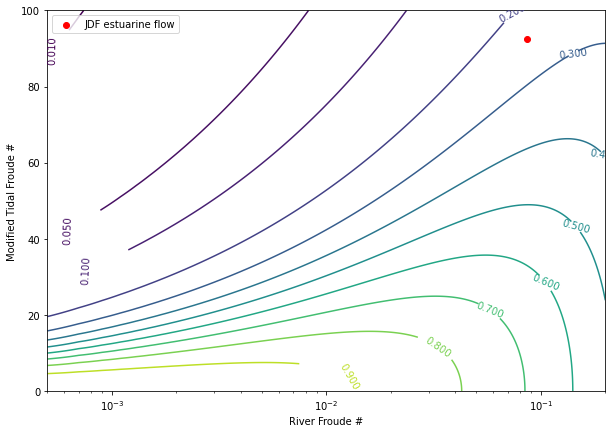

In [54]:
plt.figure(figsize = (10,7))
levels = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
CS = plt.contour(Fr,Ft,x, levels)
plt.clabel(CS, fontsize=10)
plt.xscale('log')

plt.scatter(Fr_real, Ft_real,c='r',label='JDF estuarine flow')
# for i, txt in enumerate(Qr):
#     plt.annotate(txt, (Fr_cases[i], Ft_mod_cases))
    
plt.xlabel('River Froude #')
plt.ylabel('Modified Tidal Froude #')
plt.legend(loc = 'upper left')
plt.ylim(0,100)

In [55]:
# lets calc what the actual horizontal gradient of depth-averagedsalinity at the estuary mouth is for our system
coeff = [1, 5.31*Fr_real**(2/3), (6.04*Fr_real**(4/3)) + c3*(Ft_real**2)*(Fr_real**(-2/3)), -1]
x_real = np.roots(coeff)[np.isreal(np.roots(coeff))][0]

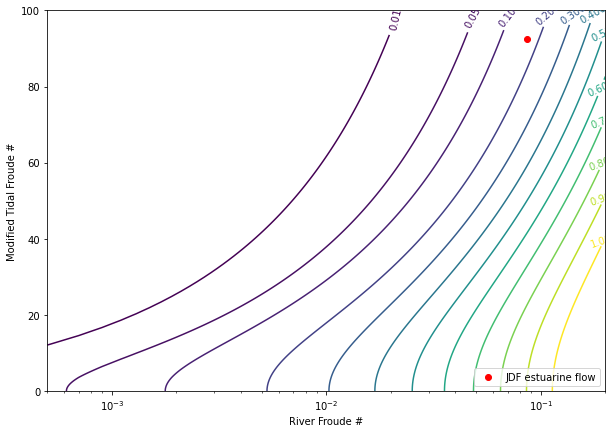

In [62]:
#now lets also remake figure 2 from Guha and Lawrence to see where we stand in that
phi = 7.06*(Fr**(2/3))*(x**2) + 8.82*(Fr**(4/3))*x

plt.figure(figsize = (10,7))
levels = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
CS = plt.contour(Fr,Ft,phi,levels)
plt.clabel(CS, fontsize=10)
plt.xscale('log')

plt.scatter(Fr_real, Ft_real,c='r',label='JDF estuarine flow')
    
plt.xlabel('River Froude #')
plt.ylabel('Modified Tidal Froude #')
plt.legend(loc = 'lower right')

In [64]:
#lets check our exact phi for our system
7.06*(Fr_real**(2/3))*(x_real**2) + 8.82*(Fr_real**(4/3))*x_real

(0.16137012332646622+0j)

not an insignificant amount larger than in the simple calculation for phi, but still results in partically mixed estuary